In [1]:
#  IMPORTS
import numpy as np
import pandas as pd
import sklearn
from sklearn.manifold import TSNE as t_sne
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import LocallyLinearEmbedding as lle
import matplotlib.pyplot as plt
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 
from ipywidgets import *

# Importing Toy Datset: Swiss roll

In [ ]:
#how to make a swiss roll dataset and apply tsne and 
X, color=make_swiss_roll(1000, noise=0.01)
n_neighbors=12
n_components=2
Y = lle(n_neighbors, n_components,eigen_solver='auto').fit_transform(X)
tsne=t_sne()
Z=tsne.fit_transform(X)
plot_comparison(X,Y,Z,color)

# Testing hyperparameters


## LLE: variation of number of neighbours

In [ ]:
max_neighbours=40
Y=[]
for i in range(max_neighbours):
    Y.append(lle(i+4, n_components,eigen_solver='auto').fit_transform(X))

def plot_y(X,Y,i):
    print('The number of neighbours is: ', i+4)
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title("Original data")
    ax = fig.add_subplot(122)
    ax.set_title("LLE")
    ax.scatter(Y[i][:, 0], Y[i][:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()


interactive(plot_y, X=fixed(X), Y=fixed(Y), color=fixed(color), i=widgets.IntSlider(min=0,max=99,step=1, value=0))

## t-SNE: variation of Perplexity

In [ ]:
Z=[]

per=np.arange(2,73,10) #51)
for p in per:
    tsne=t_sne(perplexity=p)
    Z.append(tsne.fit_transform(X))

In [ ]:
def plot_Z(X,Z,i):
    print('The perpelxity is', per[i])
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title("Original data")
    ax = fig.add_subplot(122)
    ax.set_title("t-SNE")
    ax.scatter(Z[i][:, 0], Z[i][:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()
interactive(plot_Z, X=fixed(X), Z=fixed(Z), color=fixed(color), i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0))

In [ ]:
print(len(per))

# Variation of Noise

In [ ]:
#i do not really use this one anymore
def noise_effect(n):
    X, color=make_swiss_roll(1000, noise=n)
    n_neighbors=12
    n_components=2
    Y = lle(n_neighbors, n_components,eigen_solver='auto').fit_transform(X)
    tsne=t_sne()
    Z=tsne.fit_transform(X)
    plot_comparison(X,Y,Z,color)
    
    
def plot_comparison(X, Y, Z, color):
    """ 
    Plots original data (X), LLE transformation (Y) and t-SNE transformation (Z)
    """
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title("Original data")
    ax = fig.add_subplot(132)
    ax.set_title("LLE")
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax = fig.add_subplot(133)
    ax.set_title("t-sne")
    ax.scatter(Z[:, 0], Z[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()
    
def make_data(N=500):
    noise=np.linspace(0.01,1,20)
    Xs=[]
    Ys=[]
    Zs=[]
    colors=[]
    n_neighbors=12
    n_components=2
    for n in noise: 
        X, color=make_swiss_roll(N, noise=n)
        Y = lle(n_neighbors, n_components,eigen_solver='auto').fit_transform(X)
        tsne=t_sne()
        Z=tsne.fit_transform(X)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)
        colors.append(color)
    return Xs, Ys, Zs, noise, colors

def plot_interactive(K, Xs, Ys, Zs, colors, noise):
    print('Noise value: ', noise[K])
    plot_comparison(Xs[K], Ys[K], Zs[K], colors[K])
    #K is an index, an interger from 0 to 19
    

In [ ]:
X_s, Y_s, Z_s, noise, color=make_data(1000)



In [ ]:
a=interact(plot_interactive, K=widgets.IntSlider(min=0,max=19,step=1, value=0), Xs=fixed(X_s),Ys=fixed(Y_s), Zs=fixed(Z_s), colors=fixed(color), noise=fixed(noise))


In [54]:
from  scipy.stats import norm
def reject_point(distance,sigma, threshold=False):
    """ Returns True if point is to be removed, false otherwise
    distance: a vector of distances to a given point. 
    sigma: variance of the gaussian
    threshold: if a value is given, then all distances that have a higher probability than threshold to be removed, 
    are removed. 
    """
    n=len(distance)
    probability_of_rejecting=norm.pdf(distance, scale=0.1)/norm.pdf(0,scale=0.1)
    if not threshold:
        return np.random.binomial(1,probability_of_rejecting)==1
    else: 
        return probability_of_rejecting> threshold
       

In [56]:
distance=[0]
sigma=0.1
print(x)
index=reject_point(x,sigma, threshold=0.8)
print(x[index])
print(index)

[-1.         -0.997998   -0.995996   -0.99399399 -0.99199199 -0.98998999
 -0.98798799 -0.98598599 -0.98398398 -0.98198198 -0.97997998 -0.97797798
 -0.97597598 -0.97397397 -0.97197197 -0.96996997 -0.96796797 -0.96596597
 -0.96396396 -0.96196196 -0.95995996 -0.95795796 -0.95595596 -0.95395395
 -0.95195195 -0.94994995 -0.94794795 -0.94594595 -0.94394394 -0.94194194
 -0.93993994 -0.93793794 -0.93593594 -0.93393393 -0.93193193 -0.92992993
 -0.92792793 -0.92592593 -0.92392392 -0.92192192 -0.91991992 -0.91791792
 -0.91591592 -0.91391391 -0.91191191 -0.90990991 -0.90790791 -0.90590591
 -0.9039039  -0.9019019  -0.8998999  -0.8978979  -0.8958959  -0.89389389
 -0.89189189 -0.88988989 -0.88788789 -0.88588589 -0.88388388 -0.88188188
 -0.87987988 -0.87787788 -0.87587588 -0.87387387 -0.87187187 -0.86986987
 -0.86786787 -0.86586587 -0.86386386 -0.86186186 -0.85985986 -0.85785786
 -0.85585586 -0.85385385 -0.85185185 -0.84984985 -0.84784785 -0.84584585
 -0.84384384 -0.84184184 -0.83983984 -0.83783784 -0

In [19]:
norm.pdf(0, scale=sigma)

3.9894228040143269

In [29]:
x=np.linspace(-1,1,1000)

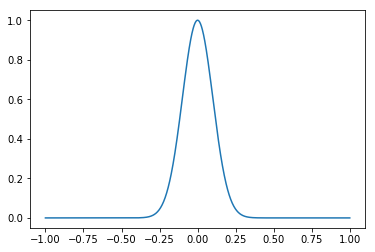

In [30]:
plt.plot(x,norm.pdf(x, scale=0.1)/norm.pdf(0,scale=0.1))

In [53]:
threshold=0
if threshold: 
    print('ja')

In [61]:
print(len(np.arange(2,150,4) ))

37
